<a href="https://colab.research.google.com/github/sarathsoman14/sarathsoman14-Hotel-Booking-Exploratory-Data-Analysis-EDA-/blob/main/Hotel_Booking_Exploratory_Data_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [1]:
# Mounting google drive to load our dataset
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [4]:
# Link the dataset and read the file
path='/content/drive/MyDrive/Colab Notebooks/Capstone Projects/Exploratory Data Analysis (EDA)/Hotel Booking/Master File-Github/'
df=pd.read_csv(path + 'Hotel Bookings.csv')

# Intial investigation on dataframe

In [5]:
# Initial checks on dataframe like:shape,head,info,describe
#  Fetching fist five rows
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
# Checking columns,datatypes,null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
# Checking descriptive statistics of given dataframe
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [8]:
# Checking column names
df.columns.tolist()

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

# DATA CLEANING : removing duplicates,null values,unwanted columns,outliners etc

In [11]:
# Making a copy of raw file to work upon to make sure raw file is intact
hotel_df=df.copy()
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
# Checking for duplicates
duplicate_rows=hotel_df[hotel_df.duplicated()]
duplicate_rows

In [16]:
duplicate_rows.shape
print('Number of duplicated rows are:',duplicate_rows.shape)

Number of duplicated rows are: (31994, 32)


In [21]:
# Droping the duplicated rows
hotel_df=hotel_df.drop_duplicates()
hotel_df.shape

(87396, 32)

In [22]:
# Checking null values
hotel_df.isna().sum().sort_values(ascending=False)

company                           82137
agent                             12193
children                              4
hotel                                 0
previous_cancellations                0
reservation_status                    0
total_of_special_requests             0
required_car_parking_spaces           0
adr                                   0
customer_type                         0
days_in_waiting_list                  0
deposit_type                          0
booking_changes                       0
assigned_room_type                    0
reserved_room_type                    0
previous_bookings_not_canceled        0
is_repeated_guest                     0
is_canceled                           0
distribution_channel                  0
market_segment                        0
country                               0
meal                                  0
babies                                0
adults                                0
stays_in_week_nights                  0


In [12]:
# As we can clearly see that there are null values in column :
# company                           82137
# agent                             12193
# country                             452
# children                              4

In [23]:
# ASSUMPTIONS TAKEN
# 452 null values in country can be taken  as "others"
# Column company,agent have very high number of null values and there is no value that we can assign as their data are random number which is not making sense.
# Column children have very less null values so droping them would not affect the analysis
# Therefore,dropping all the null values in column company,agent and children and assigning 'others' to column country.


In [19]:
# Assigning null values in column country as 'others'.
hotel_df['country'].fillna('others',inplace=True)

In [20]:
# Checking if there is still any null value present in column country.
hotel_df['country'].isna().sum()

0

In [16]:
# Checking null values again
hotel_df.isna().sum().sort_values(ascending=False)

company                           82137
agent                             12193
children                              4
hotel                                 0
previous_cancellations                0
reservation_status                    0
total_of_special_requests             0
required_car_parking_spaces           0
adr                                   0
customer_type                         0
days_in_waiting_list                  0
deposit_type                          0
booking_changes                       0
assigned_room_type                    0
reserved_room_type                    0
previous_bookings_not_canceled        0
is_repeated_guest                     0
is_canceled                           0
distribution_channel                  0
market_segment                        0
country                               0
meal                                  0
babies                                0
adults                                0
stays_in_week_nights                  0


In [17]:
# Dropping columns agent and company
hotel_df.drop(['agent','company'],axis=1,inplace=True)

In [18]:
# Checking dataframe again to check if there are any null values present on not
hotel_df.count()

hotel                             87396
is_canceled                       87396
lead_time                         87396
arrival_date_year                 87396
arrival_date_month                87396
arrival_date_week_number          87396
arrival_date_day_of_month         87396
stays_in_weekend_nights           87396
stays_in_week_nights              87396
adults                            87396
children                          87392
babies                            87396
meal                              87396
country                           87396
market_segment                    87396
distribution_channel              87396
is_repeated_guest                 87396
previous_cancellations            87396
previous_bookings_not_canceled    87396
reserved_room_type                87396
assigned_room_type                87396
booking_changes                   87396
deposit_type                      87396
days_in_waiting_list              87396
customer_type                     87396


In [19]:
# Since,data is cleaned.We can proceed with EDA

In [20]:
# Checking column names 
hotel_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

# Which hotel is prefered by most of the customers?

In [68]:
# Checking most preferred hotel
most_prefered_hotel=hotel_df['hotel'].value_counts()
most_prefered_hotel

City Hotel      53428
Resort Hotel    33968
Name: hotel, dtype: int64

Text(0, 0.5, '# of customer')

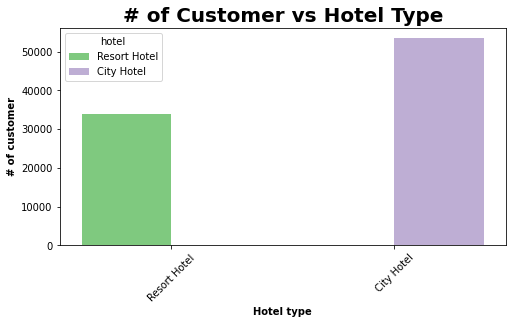

In [48]:
# Visualization in bar graph
plt.figure(figsize=(8,4))
sns.countplot(x='hotel',hue='hotel',data=hotel_df,palette='Accent',saturation=1)
plt.title('# of Customer vs Hotel Type',weight='bold',size=20)
plt.xlabel('Hotel type',weight='bold')
plt.xticks(rotation=45)
plt.ylabel('# of customer',weight='bold')

In [49]:
# Visualization in pie chart of percentage distribution of hotel
hotel_type_perecent_distribution=hotel_df['hotel'].value_counts(normalize=True)
hotel_type_perecent_distribution

City Hotel      0.611332
Resort Hotel    0.388668
Name: hotel, dtype: float64

Text(0, 0.5, 'City Hotel')

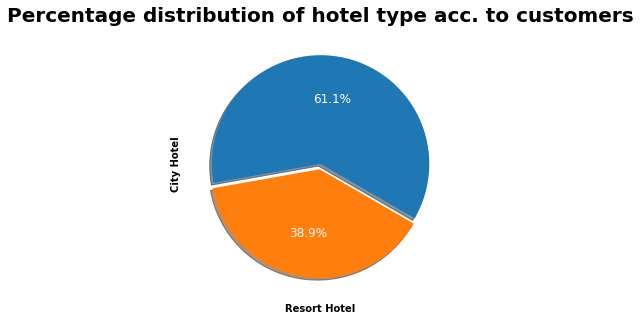

In [58]:
plt.figure(figsize=(10,5))
plt.pie(hotel_type_perecent_distribution,startangle=330,explode=(0,0.05),autopct='%1.1f%%' ,textprops={'color':"w",'fontsize':12},shadow=True)
plt.title('Percentage distribution of hotel type acc. to customers',weight='bold',size=20)
plt.xlabel('Resort Hotel',weight='bold')
plt.ylabel('City Hotel',weight='bold')

**Inference:** *It has been clear from both the graph that **City Hotel** is prefered by most of th customers and it contirubtes to **61.1%** of the total booking made*

# Which month had peak and least bookings?

In [110]:
# Finding peaking booking by month and hotel type using groupby 
peak_booking_month=hotel_df.groupby(['arrival_date_month','hotel'])['hotel'].count().unstack()
peak_booking_month
# or using pd.crosstab we can compare the two columns and get it in tabular form 
# peak_booking_month_another_way=pd.crosstab(hotel_df['arrival_date_month'],hotel_df['hotel'])
# peak_booking_month_another_way

hotel,City Hotel,Resort Hotel
arrival_date_month,,
April,5080,2828
August,6591,4666
December,3014,2117
February,3605,2493
January,2730,1963
July,5744,4313
June,5005,2760
March,4856,2657
May,5413,2942


Text(0.5, 33.0, 'Hotel Type')

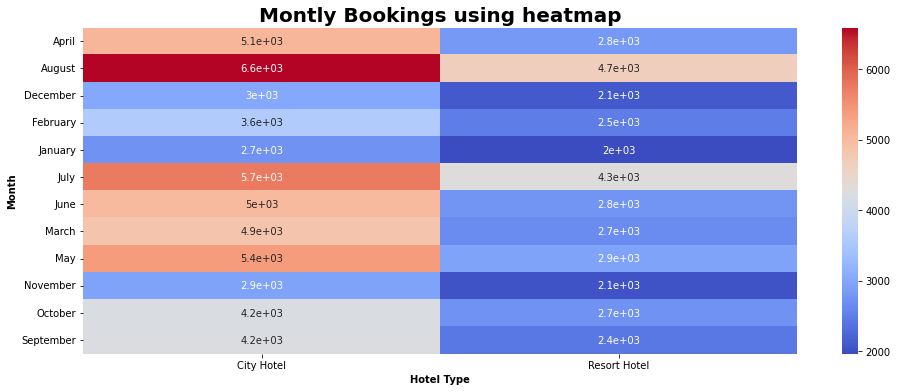

In [107]:
#Visulization:Heatmap 
plt.figure(figsize=(16,6))
sns.heatmap(peak_booking_month,cmap='coolwarm',annot=True)
plt.title('Montly Bookings using heatmap',weight='bold',size=20)
plt.ylabel('Month',weight='bold')
plt.xlabel('Hotel Type',weight='bold')


Text(0, 0.5, '# of bookings')

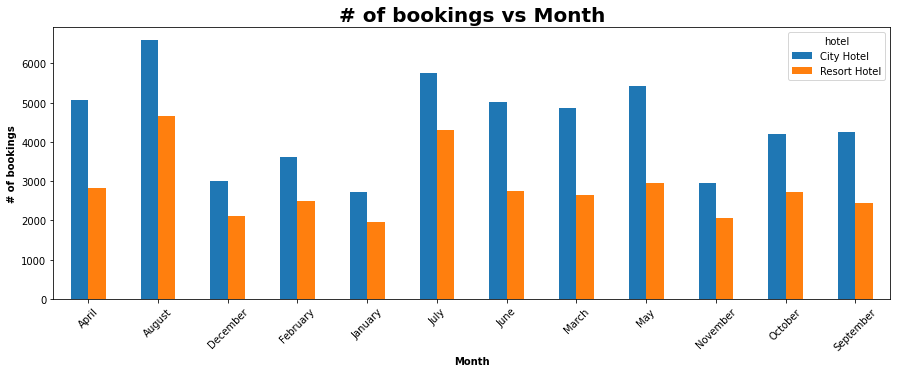

In [64]:
# Visulaization:BAR Chart
plt.rcParams['figure.figsize'] = (15, 5)
peak_booking_month.plot(kind='bar')
plt.title('# of bookings vs Month',weight='bold',size=20)
plt.xlabel('Month',weight='bold')
plt.xticks(rotation=45)
plt.ylabel('# of bookings',weight='bold')



In [111]:
# Trend in booking by year
booking_year_trend=hotel_df.groupby(['arrival_date_year','hotel'])['arrival_date_year'].count().unstack()
booking_year_trend

hotel,City Hotel,Resort Hotel
arrival_date_year,,
2015,6550,6763
2016,26759,15632
2017,20119,11573


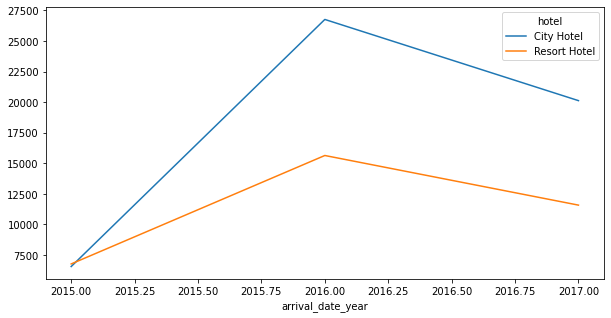

In [112]:
plt.rcParams['figure.figsize'] = (10, 5)
booking_year_trend.plot(kind='line')

In [113]:
# Conclusion:we can intrept from the graph that from 2015 to 2016 there was a increase in booking and post 2016 the booking are decreasing 

**Inference:**

*   *From **March to August**, bookings **increased** exponentially, and **August **saw the **highest** number of bookings.*

*   *From the heatmap and bar chart above, I have concluded that **August** is the busiest month for **City Hotel, followed by July and May**. Also, **July** seems to be the** busiest** month for **Resort Hotel**, followed by **August and May**.

*   *It is clear from the bar chart that in the City and Resort hotel, the **fewest** bookings occur during the months of **November, December and January**.

*   From the above line graph,it can be concluded that number of bookings **increased from year 2015 to 2016** and **started declining post year 2016**









In [33]:
# Cancellation trend
cancellaton_percentage=hotel_df['is_canceled'].value_counts(normalize=True)
cancellaton_percentage

0    0.725102
1    0.274898
Name: is_canceled, dtype: float64

Text(0, 0.5, 'Cancelled')

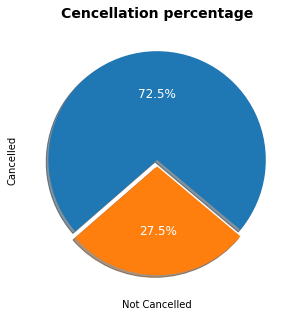

In [34]:
# Vizulization
plt.figure(figsize=(10,5))
plt.pie(cancellaton_percentage,startangle=320,explode=(0,0.06),autopct='%1.1f%%' ,textprops={'color':"w",'fontsize':12},shadow=True)
plt.title('Cencellation percentage',fontsize=14,weight='bold')
plt.xlabel('Not Cancelled')
plt.ylabel('Cancelled')


In [35]:
# conculsion over all 27.5% cancellation was observed

In [36]:
hotel_df.head(1)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01


In [37]:
cancelled_df=hotel_df.loc[df['is_canceled']==1].reset_index()
cancelled_df


,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,8,Resort Hotel,1,85,2015,July,27,1,0,3,...,A,0,No Deposit,0,Transient,82.0,0,1,Canceled,2015-05-06
1,9,Resort Hotel,1,75,2015,July,27,1,0,3,...,D,0,No Deposit,0,Transient,105.5,0,0,Canceled,2015-04-22
2,10,Resort Hotel,1,23,2015,July,27,1,0,4,...,E,0,No Deposit,0,Transient,123.0,0,0,Canceled,2015-06-23
3,27,Resort Hotel,1,60,2015,July,27,1,2,5,...,E,0,No Deposit,0,Transient,107.0,0,2,Canceled,2015-05-11
4,32,Resort Hotel,1,96,2015,July,27,1,2,8,...,E,0,No Deposit,0,Transient,108.3,0,2,Canceled,2015-05-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24020,110280,City Hotel,1,132,2017,April,17,25,0,0,...,K,1,No Deposit,0,Transient,0.0,0,3,Canceled,2017-04-25
24021,111355,City Hotel,1,4,2017,June,23,5,1,0,...,A,0,No Deposit,0,Transient,65.0,0,0,Canceled,2017-06-05
24022,111924,City Hotel,1,7,2017,May,22,31,0,1,...,A,0,No Deposit,0,Transient,65.0,0,0,Canceled,2017-05-31
24023,111925,City Hotel,1,6,2017,July,29,17,1,0,...,D,0,No Deposit,0,Transient,65.0,0,0,No-Show,2017-07-17


In [38]:
# By Year
cancellation_by_year=cancelled_df.groupby('arrival_date_year')['is_canceled'].count()
cancellation_by_year


arrival_date_year
2015     2704
2016    11208
2017    10113
Name: is_canceled, dtype: int64

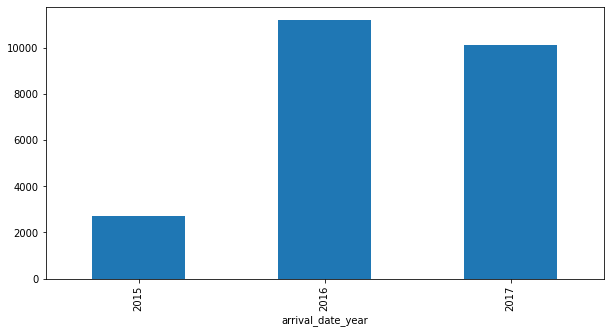

In [39]:
#Vizulization
cancellation_by_year.plot(kind='bar')

In [40]:
# Conculusion:year 2016 witnssed highest number of cancellation

In [41]:
# By Month
cancellation_by_month=cancelled_df.groupby('arrival_date_month')['is_canceled'].count()
cancellation_by_month

arrival_date_month
April        2409
August       3623
December     1378
February     1415
January      1038
July         3198
June         2354
March        1830
May          2442
November     1054
October      1642
September    1642
Name: is_canceled, dtype: int64

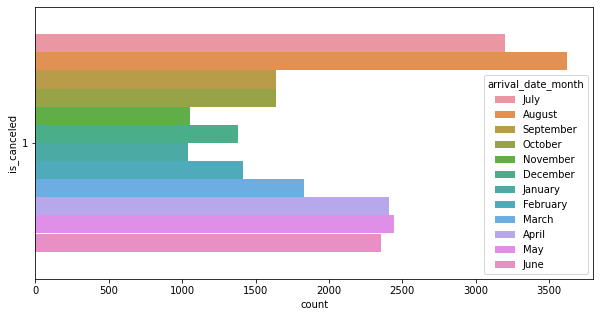

In [42]:
# Vizulization
plt.rcParams['figure.figsize'] = (10, 5)
sns.countplot(y='is_canceled',data=cancelled_df,hue='arrival_date_month')

In [43]:
# Concusion:August month had the highest number of cancellation and jan had the least

In [44]:
# By Hotel type
hotel_df.columns
cancellation_by_hotel_type=cancelled_df.groupby('is_canceled')['hotel'].value_counts(normalize = True).unstack()
cancellation_by_hotel_type


hotel,City Hotel,Resort Hotel
is_canceled,,
1,0.668012,0.331988


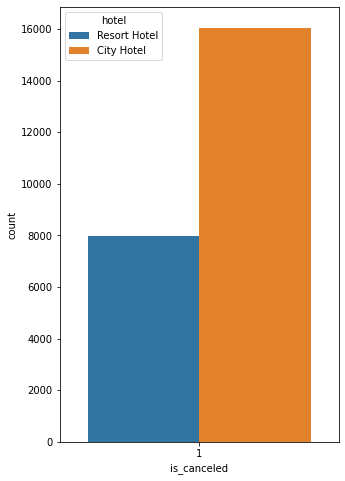

In [45]:
plt.rcParams['figure.figsize'] = (5, 8)
sns.countplot(x='is_canceled',data=cancelled_df,hue='hotel')
# here hue mean groupby

In [46]:
# Conlusion=City hotel faced highest cancellation of bookings 

In [47]:
# COUTRY
tourist_nationality_propartion=hotel_df['country'].value_counts()
tourist_nationality_propartion

PRT    27453
GBR    10433
FRA     8837
ESP     7252
DEU     5387
       ...  
MMR        1
BFA        1
CYM        1
MLI        1
KHM        1
Name: country, Length: 178, dtype: int64

In [48]:
top_5_tourist_country=tourist_nationality_propartion.iloc[0:5,].reset_index()
top_5_tourist_country


,index,country
0,PRT,27453
1,GBR,10433
2,FRA,8837
3,ESP,7252
4,DEU,5387


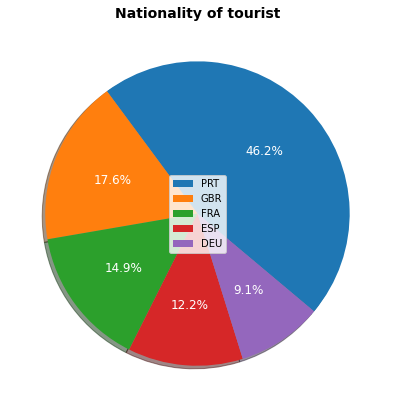

In [49]:
plt.figure(figsize=(7,7))
plt.pie(x='country',startangle=320,autopct='%1.1f%%' ,textprops={'color':"w",'fontsize':12},shadow=True,data=top_5_tourist_country)
labels=['PRT','GBR','FRA','ESP','DEU']
plt.title('Nationality of tourist',fontsize=14,weight='bold')

plt.legend(labels,loc='center')


In [50]:
# Conculsion:Tourist fro PORTUGAL is making highest number of bookings

In [51]:
hotel_df.columns


Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [52]:
# ADR=AVERAGE DAILY RATE i.e price/total rooms booked

In [53]:
# By Year
adr_year=hotel_df.groupby(['arrival_date_year','hotel'])['adr'].mean().unstack()
adr_year

hotel,City Hotel,Resort Hotel
arrival_date_year,,
2015,89.813927,94.433664
2016,107.896449,90.655998
2017,121.987908,113.013353


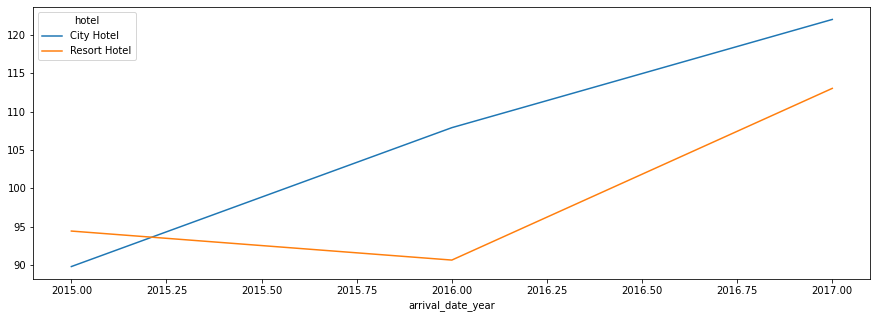

In [54]:
plt.rcParams['figure.figsize'] = (15, 5)
adr_year.plot(kind='line')

In [55]:
# Conculsion:City Hotel observed the proption growth in avg adr,and resort hotel adr was falling till pre 2016 and post 2016 it starting increasing

In [56]:
# By Month
adr_month=hotel_df.groupby('arrival_date_month')['adr'].mean().sort_values(ascending=False)
adr_month

arrival_date_month
August       150.876120
July         135.542014
June         119.750120
September    112.081263
May          111.195703
April        103.612589
October       90.152518
March         81.609523
December      81.450226
February      74.692033
November      72.754460
January       70.050742
Name: adr, dtype: float64

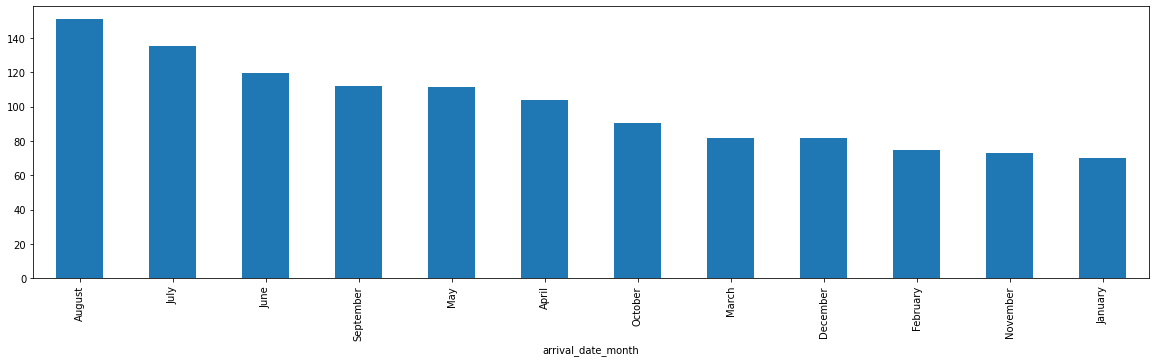

In [57]:
plt.rcParams['figure.figsize'] = (20, 5)
adr_month.plot(kind='bar')

In [58]:
# Conclsion:August is having highest adr and janurary is having lowest adr

In [59]:
# By week
adr_week=hotel_df.groupby(['arrival_date_week_number','arrival_date_month'])['adr'].mean()
adr_week

arrival_date_week_number  arrival_date_month
1                         January                82.239118
2                         January                67.533365
3                         January                68.503229
4                         January                67.254249
5                         February               73.359692
                                                   ...    
49                        November               66.877569
50                        December               73.511671
51                        December               63.642926
52                        December               73.408275
53                        December              108.099241
Name: adr, Length: 70, dtype: float64

In [60]:
hotel_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [61]:
# 

Customers prefer to stay in weekdays or weekend?

In [62]:
weekends=hotel_df.groupby(['hotel']).agg({'stays_in_weekend_nights':'sum','stays_in_week_nights':'sum'})
weekends

,stays_in_weekend_nights,stays_in_week_nights
hotel,,
City Hotel,46598,121519
Resort Hotel,41258,107930


<Figure size 504x504 with 0 Axes>

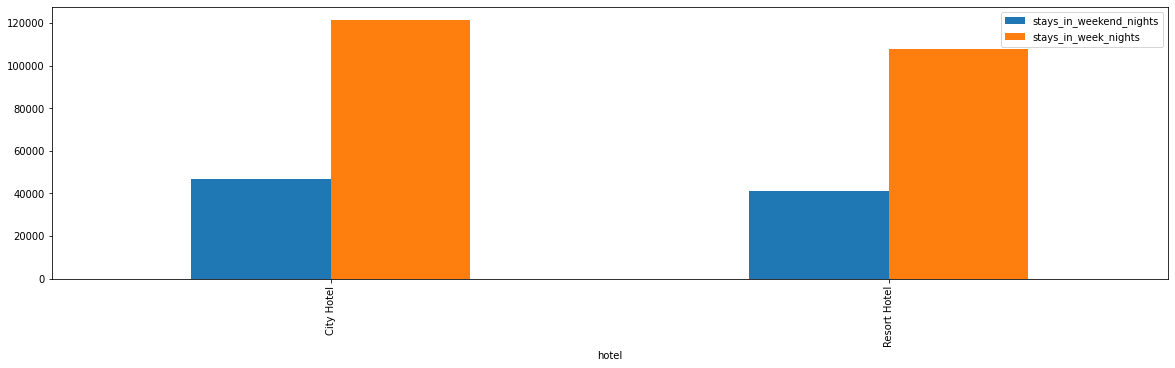

In [63]:
plt.figure(figsize=(7,7))
weekends.plot(kind='bar')


In [64]:
# Conculsion:As we can analyze that customers prefer  to stay in week days the most other than weekends

In [65]:
# MARKET SEGMENT
hotel_df['market_segment'].value_counts()

Online TA        51618
Offline TA/TO    13889
Direct           11804
Groups            4942
Corporate         4212
Complementary      702
Aviation           227
Undefined            2
Name: market_segment, dtype: int64

In [66]:
market_segment_analysis=hotel_df['market_segment'].value_counts()
market_segment_analysis

Online TA        51618
Offline TA/TO    13889
Direct           11804
Groups            4942
Corporate         4212
Complementary      702
Aviation           227
Undefined            2
Name: market_segment, dtype: int64

In [67]:
hotel_df['market_segment'].value_counts().index

Index(['Online TA', 'Offline TA/TO', 'Direct', 'Groups', 'Corporate',
       'Complementary', 'Aviation', 'Undefined'],
      dtype='object')

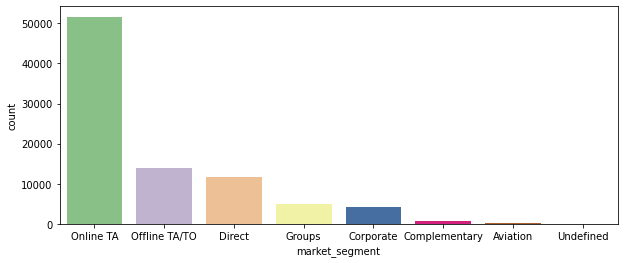

In [68]:
plt.figure(figsize=(10,4))
sns.countplot(x='market_segment',order=hotel_df['market_segment'].value_counts().index,data=hotel_df,palette='Accent')

In [69]:
# Conclusion:Most of the booking were made by Online Travel Agency,Direct Bookings are lees compare to Online TA

In [70]:
hotel_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [71]:
# Analysis on th tye of room booked vs type of room assigned
# Type of room prefere

In [72]:
most_prefered_room=hotel_df['reserved_room_type'].value_counts()
most_prefered_room

A    56552
D    17398
E     6049
F     2823
G     2052
B      999
C      915
H      596
L        6
P        6
Name: reserved_room_type, dtype: int64

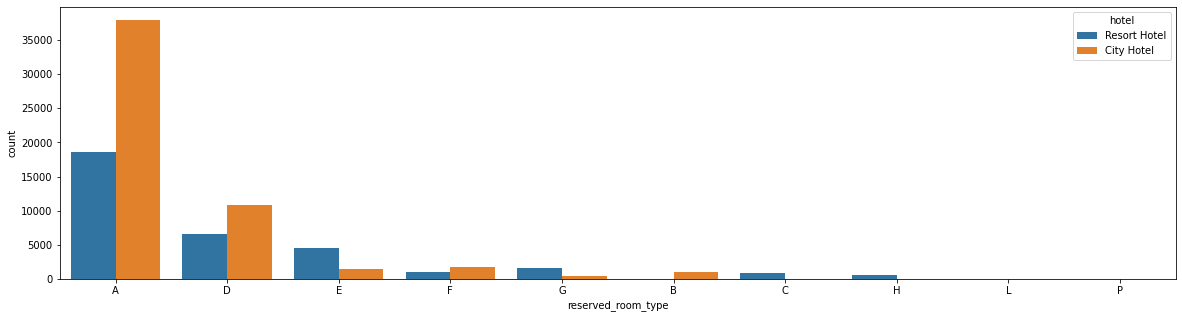

In [73]:
sns.countplot(x='reserved_room_type',data=hotel_df,order=hotel_df['reserved_room_type'].value_counts().index,hue='hotel')

In [74]:
# conslusion:Most preferd room in both the hotels are TYPE A rooms

In [75]:
#DIFFERT ROOM ASSIGNED

In [76]:
# Write a function to comapre the rooms in both columns
def get_same_type_room_assigned_or_not(a,b):
  if a==b:
    return 'Same Room Assigned'
  else:
    return "Different Room Assigned"

In [77]:
# test the function
get_same_type_room_assigned_or_not(hotel_df.iloc[0]['reserved_room_type'],hotel_df.iloc[0]['assigned_room_type'])

'Same Room Assigned'

In [ ]:
# Create new column using fucntion wrote
hotel_df['room_status']=hotel_df.apply(lambda row:get_same_type_room_assigned_or_not(row['reserved_room_type'],row['assigned_room_type']),axis=1)

In [ ]:
room_status_percent=hotel_df['room_status'].value_counts(normalize=1)
room_status_percent


In [ ]:
room_status_percent.plot(kind='pie')

In [ ]:
# Colnclusion over all ~15% room change was observed

In [ ]:
room_status_by_hotel_type=hotel_df.groupby('hotel')['room_status'].value_counts(normalize=1)
room_status_by_hotel_type

In [ ]:
room_status_for_city_hotel=room_status_by_hotel_type[0:2]

In [ ]:
a[0:2].plot(kind='pie')

In [ ]:
# Conclusion:City Hotel face ~11 % change in room in 3 years

In [ ]:
room_status_for_city_hotel=room_status_by_hotel_type[2:6]
room_status_for_city_hotel

In [ ]:
room_status_for_city_hotel.plot(kind='pie')

In [ ]:
# # Conclusion:Resort Hotel face ~20 % different rooms were assigned in 3 years

In [ ]:
by_month=hotel_df.groupby(['hotel','arrival_date_month'])['room_status'].value_counts().unstack()
by_month


In [ ]:
by_month.plot(kind='bar')

In [ ]:
# Conclusion:August was the month observed  to be have assigned diifert rooms

In [ ]:
hotel_df.columns
# BY room

In [ ]:
rooms=hotel_df.groupby('hotel')['reserved_room_type'].value_counts()
rooms

In [ ]:
sns.countplot(x='reserved_room_type',data=hotel_df,hue='hotel',order=hotel_df['reserved_room_type'].value_counts().index,palette='Accent')

In [ ]:
# Conclusion:Changes is room reserved vs assigned was found most with type A rooms,and least with TYPE F,g,b,c,h,l,p rooms